## 2-4. 점 추정과 구간 추정

### import

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3
seaborn 0.12.2


### 1. 추정
- 표본을 통해 모집단의 특성을 파악
- 종류
|종류|설명|
| --- | --- |
| 점 추정<br/>(Point Estimation) | 모집단의 모수(Parameter)를 이에 대응하는 표본의 통계량(Statistic)으로 추정 |
| 구간 추정<br/>(Interval estimation) | 모집단의 모수(Parameter)를 하나의 값이 아닌 신뢰할 수 있는 구간(범위, Interval)으로 추정 |


#### 추정량의 선택기준
- 모집단의 모수, 은 표본에서 구한 모수의 추정량)

|기준|설명|
| --- | --- |
| 불편성<br/>(Unbiasedness) | 추정량의 기대값이 모수와 같음<br/>$𝐸[\hat{𝜃}]=𝜃$ (𝜃는 모집단의 모수, $\hat{\theta}$는 표본에서 구한 모수의 추정량)|
| 효율성<br/>(Efficiency) | 추정량이 지닌 분산이 작을수록 효율성 좋음<br/>$θ^∗=argmin_{\forall 𝜃_𝑖}𝑉𝐴𝑅(𝜃_𝑖)$|
| 일치성<br/>(Consistency) | 표본 크기가 증가할수록 좋은 추정값을 제시 |
| 충분성<br/>(Sufficiency) | 모수를 추정하는 데 필요한 정보만을 포함한 값 |


####  불편 추정량(Unbiased Estimator)
- $𝐸(\hat{𝜃})=𝜃$
> 𝜃는 모집단의 모수
>
>$\hat{\theta}$은 표본에서 구한 모수의 추정량

#### 불편 추정량(Unbiased Estimator)
- Ex) 표본평균과 모평균(모집단의 평균)

> $𝐸[𝑋]=\mu$
>
>$𝐸[𝑋]=𝐸[\frac{𝑋_1+𝑋_2+…+𝑋_𝑛}{𝑛}]$
>
>$=\frac{1}{𝑛}𝐸[𝑋_1+𝑋_2+…+𝑋_𝑛]$
>
>$=\frac{1}{𝑛}𝐸[𝑋1]+𝐸[𝑋_2]+…+𝐸[𝑋_𝑛]$
>
>$=\frac{1}{}(𝜇+𝜇+…+𝜇)=𝜇$


#### 불편 추정량(Unbiased Estimator)

- Ex) 표본분산과 모분산(모집단의 분산)

$E[S^2]=E[\frac{1}{n-1}\sum_{i=1}^{n}\left(X_i - \bar{X}\right)^2]$

$=\frac{1}{n-1}E[\sum_{i=1}^{n}\left(X_i - \mu)^2-n(\mu-\bar{X}\right)^2]$

> $E[\sum_{i=1}^{n}(X_i - \mu)^2]=\sum_{i=1}^{n}\left(X_i -\mu + \mu - \bar{X}\right)^2$
>
>$=\sum_{i=1}^{n}\left(\left(X_i -\mu\right)^2 + 2 \left(X_i -\mu \right) \left(\mu - \bar{X}\right) + \left(\mu - \bar{X}\right)^2\right)$
> 
>$=\sum_{i=1}^{n}\left(X_i -\mu\right)^2 - 2n\left(\bar{X} - \mu \right)^2 + n \left(\mu - \bar{X}\right)^2$
>
>$=\sum_{i=1}^{n}\left(X_i -\mu\right)^2- n\left(\bar{X} - \mu \right)^2$

$=\frac{1}{n-1}\left(E[\sum_{i=1}^{n}(X_i - \mu)^2]-nE[(\mu-\bar{X})^2]\right)$

$=\frac{1}{n-1}\left(\sum_{i=1}^{n}E[(X_i - \mu)^2]-nVar(\bar{X})\right)$

$=\frac{1}{n-1}\left(\sum_{i=1}^{n}\sigma^2-n\frac{\sigma^2}{n}\right)=\sigma^2$

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

편향 표준 편차와 불편향 표준 편차와 실제 모표분 편차의 차이를 실험적으로 비교합니다.

</div>


In [2]:
from scipy.stats import norm, t, chi2

In [3]:
np.random.seed(42)
true_sigma = 10.0
true_mu = 0.0

print(f"True mean: {true_mu}, True std (sigma): {true_sigma}")
n = 10          # 실험당 표본수 
n_sim = 2000    # 실험 횟수

# N(true_mu, true_sigma^2)에서 표본 추출
# shape: (n_sim, n)
samples = norm.rvs(loc=true_mu, scale=true_sigma, size=(n_sim, n))

# compute biased (ddof=0) and unbiased (ddof=1) sample std
std_biased = samples.std(axis=1, ddof=0)
std_unbiased = samples.std(axis=1, ddof=1)

# 실제 표준 편차와 오차 계산
err_biased = std_biased - true_sigma
err_unbiased = std_unbiased - true_sigma

# quick summary
print("편향 표준 편차(ddof=0): 에러 평균 =", err_biased.mean())
print("불편향 표준 편차(ddof=1): 에러 평균 =", err_unbiased.mean())


True mean: 0.0, True std (sigma): 10.0
편향 표준 편차(ddof=0): 에러 평균 = -0.7329416882646391
불편향 표준 편차(ddof=1): 에러 평균 = -0.231662841773857


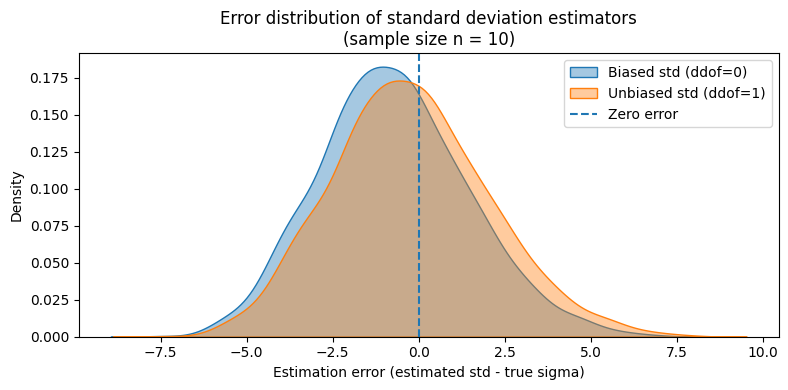

In [4]:
# In[4]: distribution of estimation errors
plt.figure(figsize=(8, 4))

sns.kdeplot(err_biased, label="Biased std (ddof=0)", fill=True, alpha=0.4)
sns.kdeplot(err_unbiased, label="Unbiased std (ddof=1)", fill=True, alpha=0.4)

plt.axvline(0, linestyle="--", linewidth=1.5, label="Zero error")

plt.title("Error distribution of standard deviation estimators\n"
          f"(sample size n = {n})")
plt.xlabel("Estimation error (estimated std - true sigma)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


### 2. 점추정

#### 점 추정량
- 모집단의 모수를 단일값으로 추정하는 것

| 추정 대상 | 통계량(Statistic) |
| --- | --- |
| 모평균<br/>(모집단의 평균) |$\bar{𝑋}=\frac{\sum_{𝑖=1}^𝑛𝑋_𝑖}{𝑛}$|
| 모분산<br/>(모집단의 분산) |$S^2=\frac{\sum_{𝑖=1}^𝑛(𝑋_𝑖-\bar{X})^2}{𝑛-1}$ |
| 모비율<br/>(모집단의 비율) |$\bar{p}=\frac{X}{n}$ <br/>X: 성공(1) 횟수, n: 표본수 |


#### 적률 방법(Method of Moments)
- 이론적 적률과 표본 적률이 같다는 가정하에 모수의 수만큼의 등식으로 연립 방정식의 해를 모수로 취함
- 이론적 적률 = 표본 적률
- Ex) 포아송 분포

포아송 분포의 1 차 적률(기대값)

>$μ_1′=E[X]=λ$
>
>$\lambda = \hat{m}_1$

1 차 표본 적률
  
>$\hat{𝑚}_1=\frac{1}{n}\sum_{i=1}^𝑛𝑥_𝑖$

포아송 분포의 2 차 적률

>$μ_2′=E[X^2]=λ^2+λ$
>
>$λ=−\frac{1−\sqrt{1+4𝑚_2^2}}{2}$

2차 표본 적률

>$\hat{𝑚}_2=\frac{1}{n}\sum_{i=1}^𝑛𝑥_𝑖^2$

▷ 효율성이 1 차 보다 떨어져 쓰이지 않음

- Ex) 감마 분포

감마 분포의 1차 적률(기대값)

> $μ_1′=E[X]=\frac{α}{𝛽}$

1 차 표본 적률

> $\hat{𝑚}_1=\frac{1}{n}\sum_{i=1}^𝑛𝑥_𝑖$
>
>$\frac{\hat{𝛼}}{\hat{𝛽}}=\hat{𝑚}_1…(1)$

감마 분포의 2차 적률

>$μ_2′=E[X^2]=\frac{𝛼(𝛼+1)}{𝛽^2}$

2 차 표본 적률

>$\hat{𝑚}_2=\frac{1}{n}\sum_{i=1}^𝑛𝑥_𝑖^2$
>
>$\frac{\hat{𝛼}(\hat{𝛼}+1)}{\hat{𝛽}^2}=\hat{𝑚}_2$…(2)

(1) (2) 연립 방정식을 풀면, 

$\hat{𝛼}=\frac{\hat{𝑚}_1^2}{\hat{𝑚}_2−\hat{𝑚}_1^2}$
,$\hat{𝛽}=\frac{\hat{𝑚}_1}{\hat{𝑚}_2−\hat{𝑚}_1^2}$


#### 최대 우도 방법(Maximum Likelihood Method)

- 우도(Likelihood): 주어진 모델이 관측 데이터를 얼마나 잘 설명하는지 나타내는 값
- 확률 분포의 우도: 주어진 확률 분포에서 관측 데이터가 나올 가능성을 나타내는 값

주어진 확률 분포의 모수(Parameter): θ

확률 변수 $X$의 관측 데이터 $x$의 우도

> $𝐿(𝜃|𝑥)=𝑓(𝑥;𝜃)$

최대 우도 추정: 관측 데이터가 나올 가능성이 가장 큰 모수 θ 를 도출


**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

동전을 10 번 던져서 앞면이 7 번 나온 사건에서 앞면이 나올 확률

</div>
    
> $𝑋 \sim 𝐵𝑖𝑛(𝑛=10,𝑝)$
>
>$𝐿(𝑝|7)=𝑓(7;𝑛=10,𝑝)$
>
>$={10 \choose 7}𝑝^7(1−𝑝^3)∝𝑝^7(1−𝑝)^3$


p 제곱항의 처리를 위해, 단조 증가 함수인 log 를 취함

> $𝐿(𝑝)=log(𝑝^7(1−𝑝)^3)=7log(p)+3log(1−p)$
>
> $\frac{𝑑𝐿(𝑝)}{𝑑𝑝}=\frac{7}{𝑝}−\frac{3}{(1−𝑝)}=0$
>
> $𝑝=0.7$


#### 표본의 통계량에서 모수가 포함될 구간 추정
- 신뢰 수준(Confidence Level): 추정한 구간에 모수가 포함될 확률: 1−𝛼 (𝛼: 유의 수준)
- 신뢰 구간(Confidence Interval): 신뢰 수준의 확률로 모수를 포함하는 너비가 가장 좁은 구간

▷ 신뢰 수준이 높을수록 신뢰 구간은 넓어짐

### 4. 모평균의 구간 추정

- 신뢰 수준: $1-\alpha$

> $𝑋 \sim 𝑁(𝜇,𝜎^2)$

- 정규 분포의 모평균
- 표본의 통계량: 표본 평균

> $\bar{𝑋}=\frac{1}{𝑛}\sum_{𝑖}^{𝑛}𝑥_𝑖$

- 표본이 서로 독립이라면,

> $\bar{𝑋} \sim 𝑁(𝜇,\frac{𝜎^2}{𝑛})$

- $\bar{X}$의 모평균 = $E[\frac{\sum_{i=1}^nX_i}{n}]=E[\frac{𝑋_1+𝑋_2+…+𝑋_𝑛}{𝑛}]=\frac{n\mu}{n}=\mu$
- $\bar{X}$의 모분산 = $V𝑎𝑟(\bar{𝑋}) = Var(\frac{𝑋_1+𝑋_2+…+𝑋_𝑛}{𝑛})=\frac{𝜎^2}{𝑛}$
- 
$𝑋_1,𝑋_2…𝑋_𝑛$이 서로 독립이라면,

   $\frac{1}{𝑛^2}𝑉𝑎𝑟(𝑋_1+𝑋_2+…+𝑋_𝑛)=\frac{𝑉𝑎𝑟(𝑋_1)+𝑉𝑎𝑟(𝑋_2)+…+𝑉𝑎𝑟(𝑋_𝑛)}{𝑛^2}$

#### 정규 분포의 모평균 구간 추정 유도 과정: $\sigma^2$ 를 알고 있다면

$𝑍=\frac{\bar{𝑋}−𝜇}{\frac{\sigma}{\sqrt{𝑛}}}$

$𝑃(−\phi\le𝑍\le\phi)=1−\alpha$, $\phi\ge0$

$𝑃(𝑍\le−\phi)=\frac{\alpha}{2}$, $𝑃(𝑍\le\phi)=1-\frac{\alpha}{2}$

$𝑍_{\frac{\alpha}{2}}=\Phi^{−1}(1−\frac{\sigma}{2})$

$−𝑍_{\frac{\alpha}{2}}\le\frac{\bar{𝑋}−𝜇}{\frac{\sigma}{\sqrt{𝑛}}}\le𝑍_{\frac{\alpha}{2}}$

$−\frac{\sigma}{\sqrt{𝑛}}𝑍_{\frac{\alpha}{2}}\le\bar{𝑋}−𝜇\le\frac{\sigma}{\sqrt{𝑛}}𝑍_{\frac{\alpha}{2}}$

$\bar{𝑋}−\frac{\sigma}{\sqrt{𝑛}}𝑍_{\frac{\alpha}{2}}\le\mu\le\bar{𝑋}+\frac{\sigma}{\sqrt{𝑛}}𝑍_{\frac{\alpha}{2}}$

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">
    
모분산이 4인 모집단에서 100개의 표본을 뽑았습니다. 이 때, 표본 평균이 124 입니다. 

표본수 100개는, 표본평균의 분포가 정규분포를 따르기에 충분한 수라고 가정합니다.

이 때, 모평균의 신뢰구간을 구하세요.(신뢰수준이 95%)
    
</div>

**[풀이]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

$\alpha = 1 - 0.95 = 0.05$
    
$124 - Z_{0.025}\frac{2}{10} \le \mu \le 124 + Z_{0.025}\frac{2}{10}$
    
</div>

In [5]:
# 풀이 과정의 내용을 계산해봅니다.

sigma2 = 4
n_sample = 100
x_bar_std = (sigma2 / n_sample) ** 0.5
x_bar = 124
c = -norm.ppf(0.025)
x_bar - x_bar_std * c, x_bar + x_bar_std * c

(123.60800720309199, 124.39199279690801)

#### 정규 분포의 모평균 구간 추정의 유도 과정: $\sigma^2$ 를 모른다면

- t-분포의 적용

- 표준 정규 분포

> $𝑋 \sim 𝑁(\mu,\sigma^2)$,  $𝑍 \sim 𝑁(0,1^2)$
>
> $𝑍=\frac{𝑋−\mu}{\sigma}$

▷ 표본 평균의 표준화

> $𝑍=\frac{\bar{𝑋}−\mu}{\frac{𝜎}{𝑛}}$

$\sigma$를 모를 때,

> $\sigma^2 \approx 𝑆^2=\sum_{i=1}^𝑛\frac{(x_𝑖−\bar{x})^2}{𝑛−1}$
>
> $\sigma$를 불편 추정량인 S(표본표준편차)로 추정
>
> $𝑍 \approx \frac{𝑋−𝜇}{𝑆^𝑛}$

Z를 구할 때, $\sigma$를 S로 추정했을 때,
발생한 편차를 보정해주는 것이 바로 t-분포

▷ $\frac{𝑋−𝜇}{\frac{S}{\sqrt{𝑛}}} \sim t(n−1)$


$t=\frac{\bar{𝑋}−𝜇}{\frac{S}{\sqrt{𝑛}}}$

$𝑃(−t_{n-1}\le t \le t_{n-1})=1−\alpha$, $t_{n-1}\ge0$

$𝑃(t_{n-1}\le−t)=\frac{\alpha}{2}$, $𝑃(t_{n-1}\le t)=1-\frac{\alpha}{2}$

$t_{\frac{\alpha}{2}, n_1}=F^{-1}_{n-1}(1−\frac{\sigma}{2})$

$t_{n-1}=t_{\frac{\alpha}{2}, n - 1}$

$−t_{\frac{\alpha}{2}, n-1}\le\frac{\bar{𝑋}−𝜇}{\frac{S}{\sqrt{𝑛}}}\le t_{\frac{\alpha}{2}, n-1}$

$−\frac{S}{\sqrt{𝑛}}t_{\frac{\alpha}{2}, n-1}\le\bar{𝑋}−𝜇\le\frac{\sigma}{\sqrt{𝑛}}t_{\frac{\alpha}{2}, n-1}$

$\bar{𝑋}−\frac{S}{\sqrt{𝑛}}t_{\frac{\alpha}{2}, n-1}\le\mu\le\bar{𝑋}+\frac{S}{\sqrt{𝑛}}t_{\frac{\alpha}{2}, n-1}$

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

모집단은 정규분포를 따르고 25개 표본을 뽑았습니다. 이 때, 표본 평균이 104이고, 표본 분산이 9입니다.
    
모평균의 신뢰구간을 구하세요.(신뢰수준이 95%)

</div>

**[풀이]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

$104 -t_{0.025,\nu=24}\frac{3}{5} \le \mu \le 104 + t_{0.025,\nu=24}\frac{3}{5}$
    
</div>

In [6]:
# 풀이 과정의 내용을 계산해봅니다.

s2 = 9
n_sample = 25
s_div_sq = (s2 / n_sample) ** 0.5
x_bar = 104
c = -t.ppf(0.025, df=n_sample-1)
x_bar - s_div_sq * c, x_bar + s_div_sq * c

(102.76166086302318, 105.23833913697682)

#### 정리

1. $\sigma^2$을 알고 있다면,

$\bar{X} - \frac{\sigma}{\sqrt{n}} Z_{\frac{\alpha}{2}} \leq \mu \leq \bar{X} + \frac{\sigma}{\sqrt{n}} Z_{\frac{\alpha}{2}}$

$Z_{\frac{\alpha}{2}} = \Phi^{-1}(1 - \frac{\alpha}{2})$ 

> $\Phi^{-1}$: 표준정규분포의 역누적분포함수<br>Quantile function or Percentile point function

$Z_{0.025} = \Phi^{-1}(0.975) \approx 1.96$

2. $\sigma^2$을 모른다면,

$\bar{X} - \frac{\sigma}{\sqrt{n}} t_{\frac{\alpha}{2}, n-1} \leq \mu \leq \bar{X} + \frac{\sigma}{\sqrt{n}} t_{\frac{\alpha}{2}, n-1}$

$t_{\frac{\alpha}{2}, n-1} = F_{n-1}^{-1}(1 - \frac{\alpha}{2})$ 

> $F_n^{-1}$: t분포의 자유도가 n의 역누적분포함수

#### 모비율의 구간 추정
- 신뢰 수준: $1-\alpha$

> $𝑋 \sim 𝐵𝑒𝑟𝑛(𝑝), 𝑋\in{0,1}$

- 표본 비율

> $\bar{𝑝}=\frac{1}{𝑛}\sum_{𝑖}^{𝑛}𝑥_𝑖$
>
> $\bar{p}$가 중심극한정리에 의해 정규 분포를 따를 만큼 표본의 수가 충분하고 표본이 서로 독립이라면,
>
> $𝑝 \sim 𝑁(𝑝,\frac{𝑝×(1−𝑝)}{𝑛}) \approx 𝑁(\bar{p}, \frac{\bar{𝑝}×(1−\bar{𝑝})}{𝑛})$

▷ 베르누이 분포의 기대값과 분산

>$𝐸[𝑋]=𝑝$
>
>$𝑉𝑎𝑟(𝑋)=𝑝×(1−𝑝)$

$\bar{𝑋}−\frac{\sigma}{\sqrt{𝑛}}𝑍_{\frac{\alpha}{2}}\le\mu\le\bar{𝑋}+\frac{\sigma}{\sqrt{𝑛}}𝑍_{\frac{\alpha}{2}}$

▷ $\bar{𝑝}−\sqrt{\frac{\bar{𝑝}×(1−\bar{𝑝})}{𝑛}}𝑍_{\frac{𝛼}{2}}\le\bar{𝑝}\le\bar{𝑝}+\sqrt{\frac{\bar{𝑝}×(1−\bar{𝑝})}{𝑛}}𝑍_{\frac{𝛼}{2}}$

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

한 쇼핑몰에서 랜덤하게 400명의 고객을 조사했더니,
그 중 120명이 “모바일 앱을 사용해서 구매한 적이 있다”고 응답했다.

이때,

전체 고객 중 “모바일 앱으로 구매하는 고객 비율(모비율)”의
95% 신뢰구간을 구하세요.

</div>

$\bar{p}= \frac{X}{n}=\frac{120}{400} =0.3$

In [7]:
X, n = 120, 400
p_bar = X / n
std_bar = (p_bar * (1 - p_bar) / n) ** 0.5
z = norm.ppf(0.975)
p_bar - std_bar * z, p_bar + std_bar * z

(0.2550915834072897, 0.34490841659271027)

#### 정규 분포의 모분산의 구간 추정
- 신뢰 수준: $1-\alpha$

> $(n−1)\frac{𝑆^2}{\sigma^2} \sim \chi(n−1)$

자유도가 𝜈인 카이제곱분포의
누적분포함수 $F(x;\nu)$라고 할 때,

$\chi_{x,\nu}=F^{-1}(x;\nu)$

> $\chi_{\frac{\alpha}{2},n−1}\le (n−1)\frac{S^2}{\sigma^2}\le\chi_{1−\frac{\alpha}{2},n−1}$
>
> $\frac{\chi_{\frac{\alpha}{2},n−1}}{(n-1)S^2}\le \frac{1}{\sigma^2}\le\frac{\chi_{1−\frac{\alpha}{2},n−1}}{(n-1)S^2}$
>
> $\frac{(n-1)S^2}{\chi_{1−\frac{\alpha}{2},n−1}}\le \sigma^2 \le\frac{(n-1)S^2}{\chi_{\frac{\alpha}{2},n−1}}$

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

어떤 공장에서 음료 병에 들어가는 양(단위: L) 을 자동으로 주입하고 있습니다.
주입기의 주입량 분포는 정규분포라고 가정합니다.

품질 관리를 위해 무작위로 15개 병을 뽑았습니다.
  
표본 분산 $S^2$가 0.04($L^2$)가 나왔을 때,

이때, 주입량의 모분산 $\sigma^2$의 95% 신뢰구간을 구하세요

In [8]:
n = 15 
S2 = 0.04
(n - 1) * S2 / (chi2.ppf(0.975, n -1)), (n - 1) * S2 / (chi2.ppf(0.025, n -1))

(0.021440373442084344, 0.09948965178774258)